In [99]:
# made by songwonmin
# https://www.kaggle.com/c/house-prices-advanced-regression-techniques
import numpy as np 
import pandas as pd 


In [100]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir("/content/drive/My Drive/AI/house-prices-advanced-regression-techniques")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [101]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [102]:
train = pd.read_csv("/content/drive/My Drive/AI/house-prices-advanced-regression-techniques/train.csv")
test = pd.read_csv("/content/drive/My Drive/AI/house-prices-advanced-regression-techniques/test.csv")
sample_submission = pd.read_csv("/content/drive/My Drive/AI/house-prices-advanced-regression-techniques/sample_submission.csv")

In [103]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [104]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [105]:
sample_submission

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [106]:
train.describe(include="all")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460,1452,1452.000000,1460,1460,1460,1423,1423,1422,1423,1460.000000,1422,1460.000000,1460.000000,1460.000000,1460,...,1460,1459,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460.000000,1460,1460.000000,770,1379,1379.000000,1379,1460.000000,1460.000000,1379,1379,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,5,3,25,9,8,5,8,NaN,NaN,NaN,NaN,6,8,15,16,4,NaN,4,5,6,4,4,4,6,NaN,6,NaN,NaN,NaN,6,...,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,PConc,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,GasA,...,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,NaN,NaN,NaN,NaN,1141,1434,515,504,864,NaN,906,1282,647,649,1311,953,430,NaN,1256,NaN,NaN,NaN,1428,...,1365,1334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735,NaN,1360,NaN,380,870,NaN,605,NaN,NaN,1311,1326,1340,NaN,NaN,NaN,NaN,NaN,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.099315,5.575342,1971.267808,1984.865753,NaN,NaN,NaN,NaN,NaN,103.685262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.639726,NaN,46.549315,567.240411,1057.429452,NaN,...,NaN,NaN,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,NaN,6.517808,NaN,0.613014,NaN,NaN,1978.506164,NaN,1.767123,472.980137,NaN,NaN,NaN,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.382997,1.112799,30.202904,20.645407,NaN,NaN,NaN,NaN,NaN,181.066207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456.098091,NaN,161.319273,441.866955,438.705324,NaN,...,NaN,NaN,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,NaN,1.625393,NaN,0.644666,NaN,NaN,24.689725,NaN,0.747315,213.804841,NaN,NaN,NaN,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,...,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,NaN,1900.000000,NaN,0.0

In [107]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [108]:
train.drop(['Alley','PoolQC','Fence','MiscFeature',"FireplaceQu"],axis=1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,0,4,2010,WD,Normal,142125


In [109]:
feature_names = ["Id","MSSubClass","MSZoning","LotArea","Street","Condition1","BldgType","OverallQual","OverallCond","YearBuilt","YearRemodAdd","ExterCond","BsmtCond","TotalBsmtSF","1stFlrSF","FullBath","BedroomAbvGr","TotRmsAbvGrd","GarageYrBlt","GarageArea","MiscVal","YrSold","SaleType","SaleCondition"]
X = train[feature_names]
test = test[feature_names]

In [110]:
object_columns = X.select_dtypes(include=['object'])
numerical_columns =X.select_dtypes(exclude=['object'])

In [111]:
object_columns.dtypes

MSZoning         object
Street           object
Condition1       object
BldgType         object
ExterCond        object
BsmtCond         object
SaleType         object
SaleCondition    object
dtype: object

In [112]:
numerical_columns.dtypes

Id                int64
MSSubClass        int64
LotArea           int64
OverallQual       int64
OverallCond       int64
YearBuilt         int64
YearRemodAdd      int64
TotalBsmtSF       int64
1stFlrSF          int64
FullBath          int64
BedroomAbvGr      int64
TotRmsAbvGrd      int64
GarageYrBlt     float64
GarageArea        int64
MiscVal           int64
YrSold            int64
dtype: object

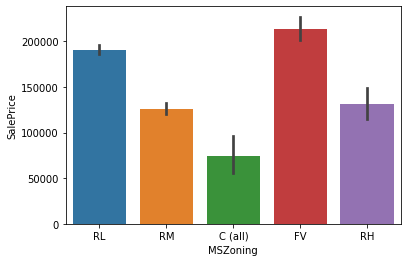

In [113]:
sns.barplot(x="MSZoning",y="SalePrice",data=train)
# MSZoning: 일반 구역 구분
# 물위에 있는 집이 가장 비싸고 주거용으로 저밀도인 지역이 가격이 높다.

In [114]:
X.MSZoning.sample(10)

722     RL
1257    RL
378     RL
1175    RL
1312    RL
702     RL
53      RL
834     RL
1229    RL
686     FV
Name: MSZoning, dtype: object

In [115]:
MSZoning_group_mapping={"RL":0,"RM":1,"C (all)":2,"FV":3,"RH":4}
X["MSZoning"]=X["MSZoning"].map(MSZoning_group_mapping)
test["MSZoning"]=test["MSZoning"].map(MSZoning_group_mapping)

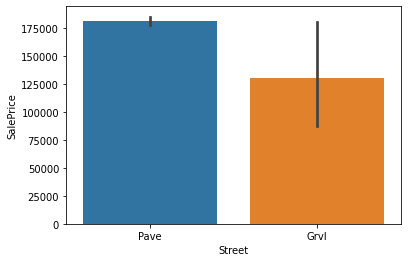

In [116]:
sns.barplot(x="Street",y="SalePrice",data=train)
# Street: 도로 접근 유형 -> 비포장 도로 보단, 포장도로일수록 가격이 높다는 것을 알 수 있다

In [117]:
Street_group_mapping={"Pave":0,"Grvl":1}
X["Street"]=X["Street"].map(Street_group_mapping)
test["Street"]=test["Street"].map(Street_group_mapping)

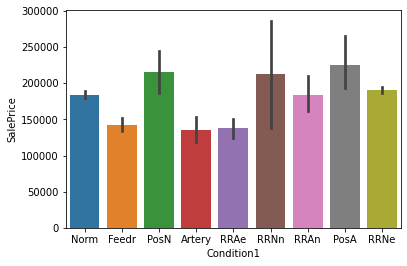

In [118]:
sns.barplot(x="Condition1",y="SalePrice",data=train)
# Condition1: 간선도로 또는 철도와의 근접성
# 공원이 근처에 있고 철도가 바로 옆에 있는 것 보다 200호이내 있을 때 가격이 높다.

In [119]:
Condition1_group_mapping={"Norm":0,"Feedr":1,"PosN":2,"Artery":3,"RRAe":4,"RRNn":5,"RRAn":6,"PosA":7,"RRNe":8}
X["Condition1"]=X["Condition1"].map(Condition1_group_mapping)
test["Condition1"]=test["Condition1"].map(Condition1_group_mapping)

In [120]:
X.isnull().sum()

Id                0
MSSubClass        0
MSZoning          0
LotArea           0
Street            0
Condition1        0
BldgType          0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
ExterCond         0
BsmtCond         37
TotalBsmtSF       0
1stFlrSF          0
FullBath          0
BedroomAbvGr      0
TotRmsAbvGrd      0
GarageYrBlt      81
GarageArea        0
MiscVal           0
YrSold            0
SaleType          0
SaleCondition     0
dtype: int64

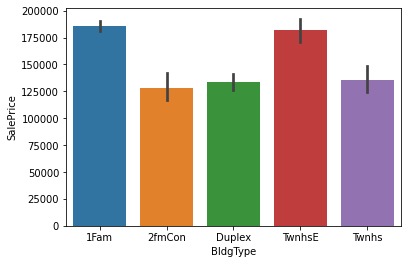

In [121]:
sns.barplot(x="BldgType",y="SalePrice",data=train)
# BldgType: 주거 유형 -> 1인 가구와 Townhouse End Unit의 가격이 비싸고 나머지는 비슷하다.

In [122]:
X.BldgType.sample(10)

22        1Fam
1243      1Fam
141       1Fam
312     2fmCon
1028      1Fam
719       1Fam
1235      1Fam
1273      1Fam
1123      1Fam
797       1Fam
Name: BldgType, dtype: object

In [123]:
BldgType_group_mapping={"1Fam":0,"2fmCon":1,"Duplex":2,"TwnhsE":3,"Twnhs":4}
X["BldgType"]=X["BldgType"].map(BldgType_group_mapping)
test["BldgType"]=test["BldgType"].map(BldgType_group_mapping)

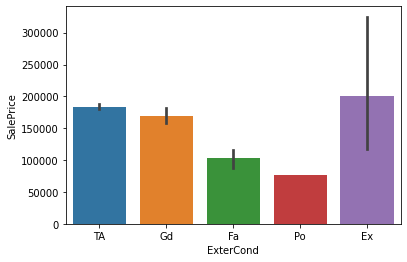

In [124]:
sns.barplot(x="ExterCond",y="SalePrice",data=train)
# ExterCond: 외관 -> 평균 이상이면 가격 변동은 크지 않지만, 평균 미만일 경우 가격 하락폭이 크다.

In [125]:
ExterCond_group_mapping={"TA":0,"Gd":1,"Fa":2,"Po":3,"Ex":4}
X["ExterCond"]=X["ExterCond"].map(ExterCond_group_mapping)
test["ExterCond"]=test["ExterCond"].map(ExterCond_group_mapping)

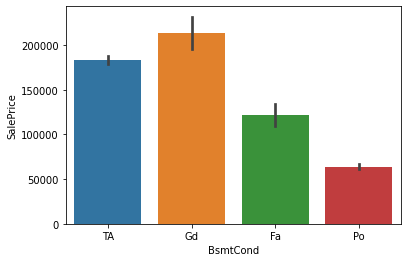

In [126]:
sns.barplot(x="BsmtCond",y="SalePrice",data=train)
# BsmtCond : 지하실의 일반상태
# 지하실의 상태가 좋을수록 가격이 높다.

In [127]:
BsmtCond_group_mapping={"TA":0,"Gd":1,"Fa":2,"Po":3}
X["BsmtCond"]=X["BsmtCond"].map(BsmtCond_group_mapping)
test["BsmtCond"]=test["BsmtCond"].map(BsmtCond_group_mapping)

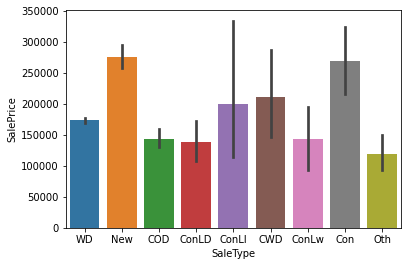

In [128]:
sns.barplot(x="SaleType",y="SalePrice",data=train)
#SaleType: 판매 유형
#새로 지은 집일 때 가격이 비쌌고 저금리나 현금으로 구매 할 때도 가격이 비쌌다.

In [129]:
SaleType_group_mapping={"WD":0,"New":1,"COD":2,"ConLD":3,"ConLi":4,"CWD":5,"ConLw":6,"Con":7,"Oth":8}
X["SaleType"]=X["SaleType"].map(SaleType_group_mapping)
test["SaleType"]=test["SaleType"].map(SaleType_group_mapping)

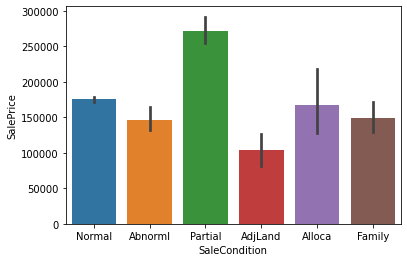

In [130]:
sns.barplot(x="SaleCondition",y="SalePrice",data=train)
# SaleCondition: 판매조건
# 새로 지은 집이 가장 비싸다.

In [131]:
SaleCondition_group_mapping={"Normal":0,"Abnorml":1,"Partial":2,"AdjLand":3,"Alloca":4,"Family":5}
X["SaleCondition"]=X["SaleCondition"].map(SaleCondition_group_mapping)
test["SaleCondition"]=test["SaleCondition"].map(SaleCondition_group_mapping)

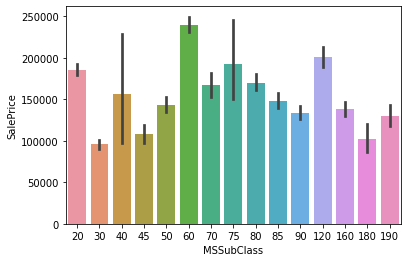

In [132]:
sns.barplot(x="MSSubClass",y="SalePrice",data=train)

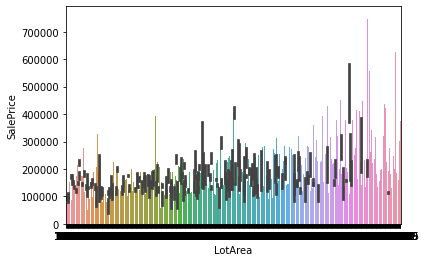

In [133]:
sns.barplot(x="LotArea",y="SalePrice",data=train)
#you die 예아 미친놈되는중

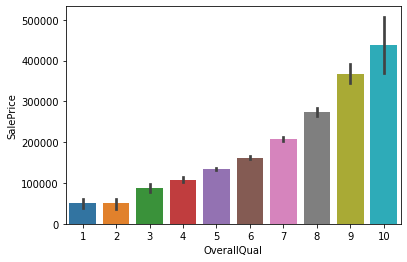

In [134]:
sns.barplot(x="OverallQual",y="SalePrice",data=train)
#OverallQual: 전체재료 및 마감 품질
#마감 품질이 높을수록 가격이 높다는 것을 알 수 있다.

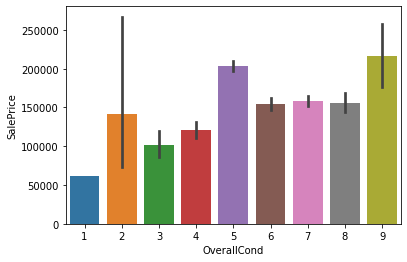

In [135]:
sns.barplot(x="OverallCond",y="SalePrice",data=train)
# OverallCond: 전반적인 상태 등급 -> 2, 5, 9등급의 집값이 주변 등급 대비 높으며, 6~8등급의 집값은 비슷하다.

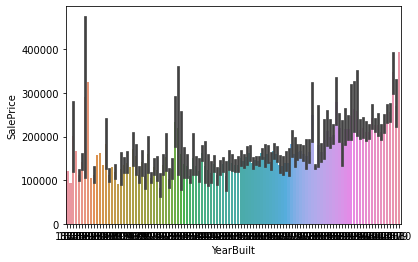

In [136]:
sns.barplot(x="YearBuilt",y="SalePrice",data=train)

In [137]:
X["YearBuilt"].describe()

count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64

In [138]:
X["YearBuilt"]

0       2003
1       1976
2       2001
3       1915
4       2000
        ... 
1455    1999
1456    1978
1457    1941
1458    1950
1459    1965
Name: YearBuilt, Length: 1460, dtype: int64

In [139]:
YearBuilt_slice=np.linspace(1870,2010,15)

In [140]:
YearBuilt_slice

array([1870., 1880., 1890., 1900., 1910., 1920., 1930., 1940., 1950.,
       1960., 1970., 1980., 1990., 2000., 2010.])

In [141]:
YearBuilt_labels=np.arange(0,14)

In [142]:
YearBuilt_labels

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [143]:
X["YearBuiltGroup"]=pd.cut(X["YearBuilt"],YearBuilt_slice,labels=YearBuilt_labels)
test["YearBuiltGroup"]=pd.cut(test["YearBuilt"],YearBuilt_slice,labels=YearBuilt_labels)

In [144]:
X["YearBuiltGroup"]

0       13
1       10
2       13
3        4
4       12
        ..
1455    12
1456    10
1457     7
1458     7
1459     9
Name: YearBuiltGroup, Length: 1460, dtype: category
Categories (14, int64): [0 < 1 < 2 < 3 ... 10 < 11 < 12 < 13]

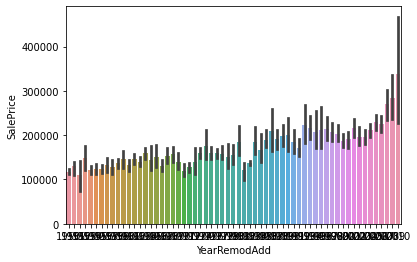

In [145]:
sns.barplot(x="YearRemodAdd",y="SalePrice",data=train)

In [146]:
X["YearRemodAdd"].describe()

count    1460.000000
mean     1984.865753
std        20.645407
min      1950.000000
25%      1967.000000
50%      1994.000000
75%      2004.000000
max      2010.000000
Name: YearRemodAdd, dtype: float64

In [147]:
YearRemodAdd_slice=np.linspace(1950,2010,7)

In [148]:
YearRemodAdd_labels=np.arange(0,6)

In [149]:
X["YearRemodAddGroup"]=pd.cut(X["YearRemodAdd"],YearRemodAdd_slice,labels=YearRemodAdd_labels)
test["YearRemodAddGroup"]=pd.cut(test["YearRemodAdd"],YearRemodAdd_slice,labels=YearRemodAdd_labels)

In [150]:
X["YearRemodAddGroup"]

0       5
1       2
2       5
3       1
4       4
       ..
1455    4
1456    3
1457    5
1458    4
1459    1
Name: YearRemodAddGroup, Length: 1460, dtype: category
Categories (6, int64): [0 < 1 < 2 < 3 < 4 < 5]

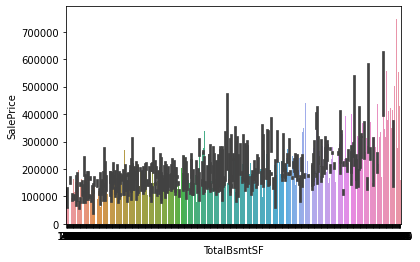

In [151]:
sns.barplot(x="TotalBsmtSF",y="SalePrice",data=train)

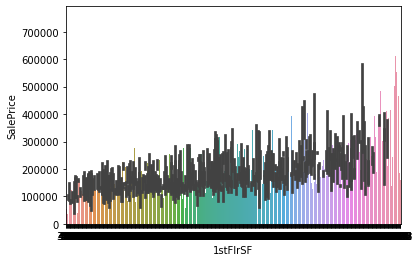

In [152]:
sns.barplot(x="1stFlrSF",y="SalePrice",data=train)

In [153]:
X["1stFlrSF"].describe()

count    1460.000000
mean     1162.626712
std       386.587738
min       334.000000
25%       882.000000
50%      1087.000000
75%      1391.250000
max      4692.000000
Name: 1stFlrSF, dtype: float64

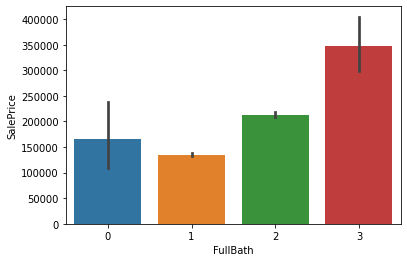

In [154]:
sns.barplot(x="FullBath",y="SalePrice",data=train)
# FullBath: 등급 이상의 전체 욕실
# 욕실의 개수가 많을수록 가격이 높다.

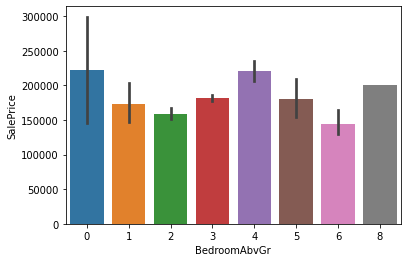

In [155]:
sns.barplot(x="BedroomAbvGr",y="SalePrice",data=train)
# Bedroom: 지하층 이상 침실 수
# 침실개수는 4개일 때와 8개일 때 가격이 높은 걸로 보아 가족 구성원수에 맞게 침실이 있을 때 가격이 높은 것 같다.

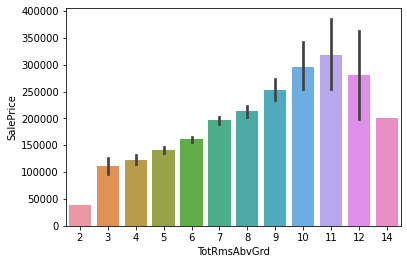

In [156]:
sns.barplot(x="TotRmsAbvGrd",y="SalePrice",data=train)
# TotRmsAbvGrd: 총 객실 등급 이상(화장실 포함 안 함) -> 방의 수가 11개까지는 가격이 증가하고 이후로는 감소한다.

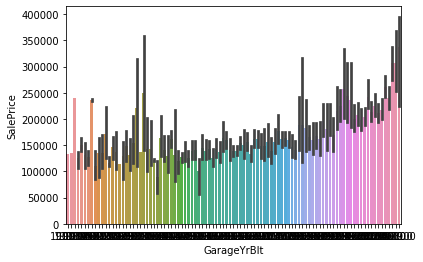

In [157]:
sns.barplot(x="GarageYrBlt",y="SalePrice",data=train)

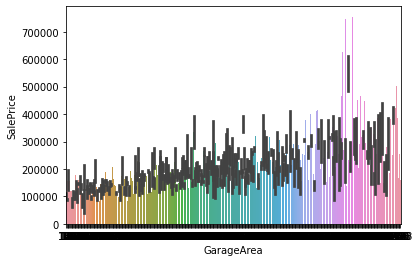

In [158]:
sns.barplot(x="GarageArea",y="SalePrice",data=train)

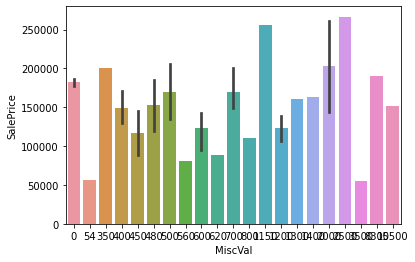

In [159]:
sns.barplot(x="MiscVal",y="SalePrice",data=train)
# MiscVal: 기타 기능의 $값  -> 기타 기능의 값과 집값의 연관성은 크게 없다

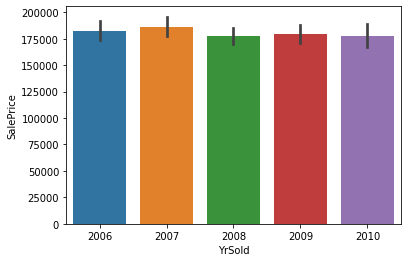

In [160]:
sns.barplot(x="YrSold",y="SalePrice",data=train)
# YrSold: 판매 연도 -> 판매 연도와 짒갑의 연관성은 없다.

In [161]:
blacklist = ["LotArea","TotalBsmtSF","1stFlrSF","GarageYrBlt","GarageArea","YearBuilt","YearRemodAdd"]

In [162]:
X = X.drop(blacklist,axis=1)
test = test.drop(blacklist,axis=1)

In [163]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Id                 1460 non-null   int64   
 1   MSSubClass         1460 non-null   int64   
 2   MSZoning           1460 non-null   int64   
 3   Street             1460 non-null   int64   
 4   Condition1         1460 non-null   int64   
 5   BldgType           1460 non-null   int64   
 6   OverallQual        1460 non-null   int64   
 7   OverallCond        1460 non-null   int64   
 8   ExterCond          1460 non-null   int64   
 9   BsmtCond           1423 non-null   float64 
 10  FullBath           1460 non-null   int64   
 11  BedroomAbvGr       1460 non-null   int64   
 12  TotRmsAbvGrd       1460 non-null   int64   
 13  MiscVal            1460 non-null   int64   
 14  YrSold             1460 non-null   int64   
 15  SaleType           1455 non-null   float64 
 16  SaleCo

In [164]:
y = train["SalePrice"]

In [165]:
X.isnull().sum()

Id                     0
MSSubClass             0
MSZoning               0
Street                 0
Condition1             0
BldgType               0
OverallQual            0
OverallCond            0
ExterCond              0
BsmtCond              37
FullBath               0
BedroomAbvGr           0
TotRmsAbvGrd           0
MiscVal                0
YrSold                 0
SaleType               5
SaleCondition          0
YearBuiltGroup         0
YearRemodAddGroup    178
dtype: int64

In [166]:
X["SaleType"]=X["SaleType"].notnull().astype("int64")
X["YearBuiltGroup"]=X["YearBuiltGroup"].notnull().astype("int64")
X["YearRemodAddGroup"]=X["YearRemodAddGroup"].notnull().astype("int64")
test["SaleType"]=test["SaleType"].notnull().astype("int64")
test["YearBuiltGroup"]=test["YearBuiltGroup"].notnull().astype("int64")
test["YearRemodAddGroup"]=test["YearRemodAddGroup"].notnull().astype("int64")

In [167]:
X["BsmtCond"]=X["BsmtCond"].fillna("0")
X["YearRemodAddGroup"]=X["YearRemodAddGroup"].fillna("0")

test["MSZoning"]=test["MSZoning"].fillna("0")
test["BsmtCond"]=test["BsmtCond"].fillna("0")
test["YearRemodAddGroup"]=test["YearRemodAddGroup"].fillna("0")

In [168]:
numerical_columns2 = X.select_dtypes(exclude=['object'])
numerical_columnstest = test.select_dtypes(exclude=['object'])

In [169]:
numerical_columns2.dtypes

Id                   int64
MSSubClass           int64
MSZoning             int64
Street               int64
Condition1           int64
BldgType             int64
OverallQual          int64
OverallCond          int64
ExterCond            int64
FullBath             int64
BedroomAbvGr         int64
TotRmsAbvGrd         int64
MiscVal              int64
YrSold               int64
SaleType             int64
SaleCondition        int64
YearBuiltGroup       int64
YearRemodAddGroup    int64
dtype: object

In [170]:
numerical_columnstest.dtypes

Id                   int64
MSSubClass           int64
Street               int64
Condition1           int64
BldgType             int64
OverallQual          int64
OverallCond          int64
ExterCond            int64
FullBath             int64
BedroomAbvGr         int64
TotRmsAbvGrd         int64
MiscVal              int64
YrSold               int64
SaleType             int64
SaleCondition        int64
YearBuiltGroup       int64
YearRemodAddGroup    int64
dtype: object

^^ㅣ object 안했다

In [171]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [172]:
from sklearn.metrics import mean_squared_error
from math import sqrt
def rmse(y,preds):
    return sqrt(mean_squared_error(preds, y))

In [173]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

In [174]:
ferrari = DecisionTreeRegressor(random_state=1)
ferrari.fit(train_X, train_y)
val_predictions = ferrari.predict(val_X)
val_mae = rmse(val_predictions, val_y)
print("score: {:.0f}".format(val_mae))

score: 42478


In [175]:
porsche = DecisionTreeRegressor(max_leaf_nodes=100, random_state=1)
porsche.fit(train_X, train_y)
val_predictions = porsche.predict(val_X)
val_mae = rmse(val_y, val_predictions)
print("score: {:.0f}".format(val_mae))

score: 39224


In [176]:
pagani = RandomForestRegressor(random_state=1)
pagani.fit(train_X, train_y)
rf_val_predictions = pagani.predict(val_X)
rf_val_mae = rmse(rf_val_predictions, val_y)

print("score: {:.0f}".format(rf_val_mae))

score: 35548


In [177]:
lamborghini = RandomForestRegressor(random_state=1)
lamborghini.fit(X, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [178]:
sample_submission

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [179]:
test

,Id,MSSubClass,MSZoning,Street,Condition1,BldgType,OverallQual,OverallCond,ExterCond,BsmtCond,FullBath,BedroomAbvGr,TotRmsAbvGrd,MiscVal,YrSold,SaleType,SaleCondition,YearBuiltGroup,YearRemodAddGroup
0,1461,20,4,0,1,0,5,6,0,0,1,2,5,0,2010,1,0,1,1
1,1462,20,0,0,0,0,6,6,0,0,1,3,6,12500,2010,1,0,1,1
2,1463,60,0,0,0,0,5,5,0,0,2,3,6,0,2010,1,0,1,1
3,1464,60,0,0,0,0,6,6,0,0,2,3,7,0,2010,1,0,1,1
4,1465,120,0,0,0,3,8,5,0,0,2,2,5,0,2010,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,1,0,0,4,4,7,0,0,1,3,5,0,2006,1,0,1,1
1455,2916,160,1,0,0,3,4,5,0,0,1,3,6,0,2006,1,1,1,1
1456,2917,20,0,0,0,0,5,7,0,0,1,4,7,0,2006,1,1,1,1
1457,2918,85,0,0,0,0,5,5,0,0,1,3,6,700,2006,1,0,1,1


In [180]:
X

,Id,MSSubClass,MSZoning,Street,Condition1,BldgType,OverallQual,OverallCond,ExterCond,BsmtCond,FullBath,BedroomAbvGr,TotRmsAbvGrd,MiscVal,YrSold,SaleType,SaleCondition,YearBuiltGroup,YearRemodAddGroup
0,1,60,0,0,0,0,7,5,0,0,2,3,8,0,2008,1,0,1,1
1,2,20,0,0,1,0,6,8,0,0,2,3,6,0,2007,1,0,1,1
2,3,60,0,0,0,0,7,5,0,0,2,3,6,0,2008,1,0,1,1
3,4,70,0,0,0,0,7,5,0,1,1,3,7,0,2006,1,1,1,1
4,5,60,0,0,0,0,8,5,0,0,2,4,9,0,2008,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,0,0,0,0,6,5,0,0,2,3,7,0,2007,1,0,1,1
1456,1457,20,0,0,0,0,6,6,0,0,2,3,7,0,2010,1,0,1,1
1457,1458,70,0,0,0,0,7,9,1,1,2,4,9,2500,2010,1,0,1,1
1458,1459,20,0,0,0,0,5,6,0,0,1,2,5,0,2010,1,0,1,1


In [181]:
test_preds = lamborghini.predict(test)
output = pd.DataFrame({'Id': test["Id"],
                       'SalePrice': test_preds})
output.to_csv('lamborghini1.csv', index=False)